In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("bank-full.csv", sep=";")
data.shape

(45211, 17)

In [4]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
for c in data.columns:
    if data[c].dtype == "object":
        print("#",c)
        print(data[c].unique())
        print("")

# job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

# marital
['married' 'single' 'divorced']

# education
['tertiary' 'secondary' 'unknown' 'primary']

# default
['no' 'yes']

# housing
['yes' 'no']

# loan
['no' 'yes']

# contact
['unknown' 'cellular' 'telephone']

# month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

# poutcome
['unknown' 'failure' 'other' 'success']

# y
['no' 'yes']



In [8]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
a = data.y.value_counts()
print("{0:.2f}% of users didnt subscribe".format( a[0] *100 /data.shape[0]) )
print("{0:.2f}% of users subscribed".format( a[1] *100 /data.shape[0]) )


88.30% of users didnt subscribe
11.70% of users subscribed


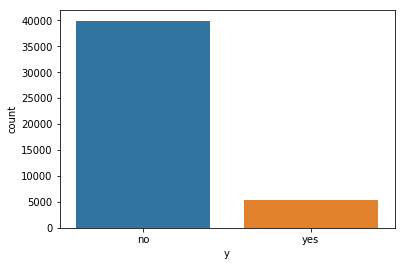

In [10]:
sns.countplot(x='y', data=data)

# Pre-Processing

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


In [23]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ["age","balance","day","duration","campaign","pdays","previous"]
categorical_features = set(data.columns) - set(numeric_features)


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(solver='lbfgs'))])

In [26]:
cleaned_data = preprocessor.fit_transform(data)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [24]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(solver='lbfgs'))])

In [25]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [22]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object